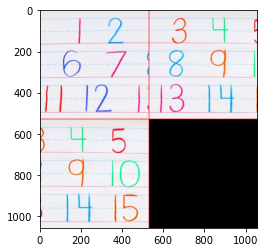

In [19]:
from scripts.empatches import EMPatches
import imgviz  # just for plotting
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('screens/digit.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

emp = EMPatches()
patches = emp.extract_patches(img, patchsize=527, overlap=0.2)

# displaying 1st 10 image patches
tiled = imgviz.tile(list(map(np.uint8, patches.imgs)), border=(255, 0, 0))
plt.figure()
plt.imshow(tiled)

## Update patches.

In [20]:
# apply single image change.
shift_index = [1]
img_BGR_1 = cv2.cvtColor(patches.imgs[shift_index[0]].squeeze(), cv2.COLOR_RGB2BGR)

patches.update(img_BGR_1, shift_index)

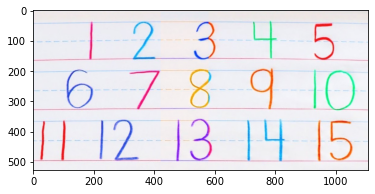

In [21]:
merged_img = emp.merge_patches(patches)
# display
plt.figure()
plt.imshow(merged_img.astype(np.uint8))

If you update patches already updated, it raises Value Error.

In [22]:
# apply multiple images change.
shift_index = [0, 2]
img_BGR_1 = cv2.cvtColor(patches.imgs[shift_index[0]].squeeze(), cv2.COLOR_RGB2BGR)
img_BGR_2 = cv2.cvtColor(patches.imgs[shift_index[1]].squeeze(), cv2.COLOR_RGB2BGR)

patches.update(np.stack([img_BGR_1, img_BGR_2]), shift_index)

ValueError: Patches already updated. please .reset() before update.

So, use reset() before update.

In [ ]:
patches.reset()

# apply multiple images change.
shift_index = [0, 2]
img_BGR_1 = cv2.cvtColor(patches.imgs[shift_index[0]].squeeze(), cv2.COLOR_RGB2BGR)
img_BGR_2 = cv2.cvtColor(patches.imgs[shift_index[1]].squeeze(), cv2.COLOR_RGB2BGR)

patches.update(np.stack([img_BGR_1, img_BGR_2]), shift_index)

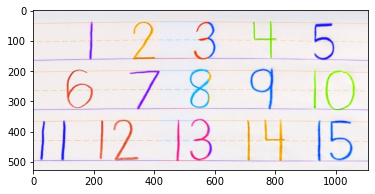

In [ ]:
merged_img = emp.merge_patches(patches)
# display
plt.figure()
plt.imshow(merged_img.astype(np.uint8))

## Restore
You can restore patches from origin.

In [ ]:
patches.reset()

<Figure size 432x288 with 0 Axes>

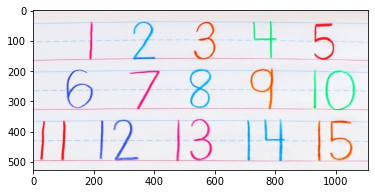

In [ ]:
merged_img = emp.merge_patches(patches)
# display
plt.clf()
plt.figure()
plt.imshow(merged_img.astype(np.uint8))